In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import seaborn as sns

In [2]:
import json

# Function to load configurations
def load_config(config_file):
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

# Load the configuration
config = load_config('config/config.json')

# Access the dataset path
dataset_dir = config['dataset_path']
train_dir = config['train_path']
val_dir = config['val_path']
test_dir = config['test_path']
pth_file = config['Pth_Files']

In [53]:
from tkinter.filedialog import test


val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    #batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for correctly matching labels to predictions
)

Found 13 images belonging to 2 classes.


## CNN Tensorflow

In [54]:
model = load_model('Pth_Files/CNN_model_test_40.keras')

In [55]:
# Predict probabilities for the positive class
predictions = model.predict(validation_generator, steps=len(validation_generator))
y_pred_probs = predictions.ravel()
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = validation_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
              precision    recall  f1-score   support

      edible       0.92      1.00      0.96        12
   poisonous       0.00      0.00      0.00         1

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13

Confusion Matrix:
[[12  0]
 [ 1  0]]


/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/Thesis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


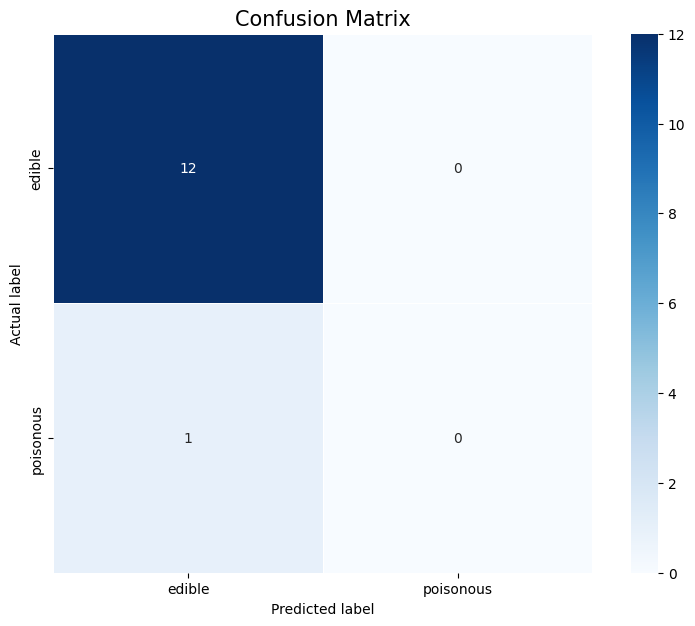

In [56]:
# Assuming y_pred and y_true are defined as before
cm = confusion_matrix(y_true, y_pred)
def plot_confusion_matrix(cm, class_names):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix', size = 15)

# Assuming class_indices is available from your validation_generator or you define it yourself
class_names = list(validation_generator.class_indices.keys())
plot_confusion_matrix(cm, class_names)
plt.show()

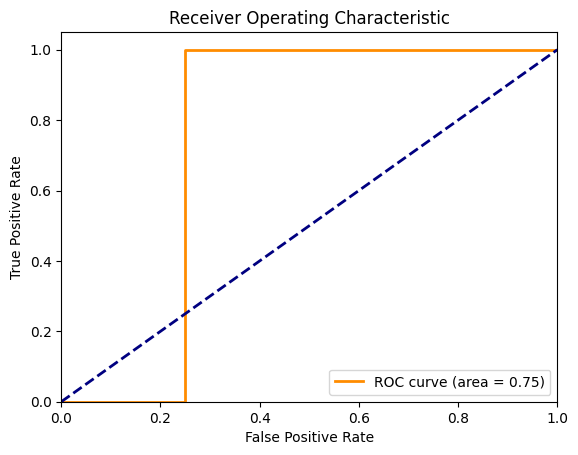

In [57]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## CNN Pytorch

## RNN

## MobileNet

## Resnet

## Vgg16